7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

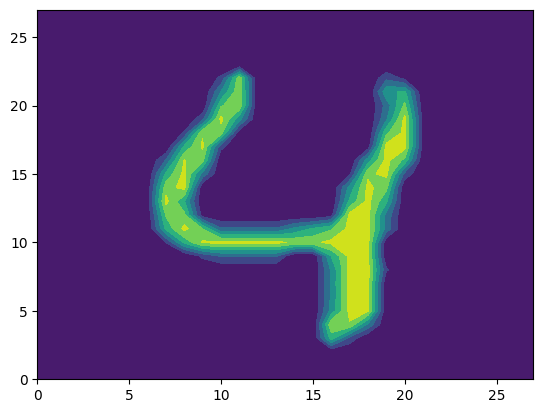

In [112]:
import pandas as pd
from keras.datasets import mnist

df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n')
    print(X_test[i],'\n')
    plt.contourf(np.rot90(X_test[i].transpose()))
    plt.show


## Computer Vision

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

### #2 What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?


In [113]:
#2 was just messing around a bit with this problem, tinkering around with my python skills , way more work than needed

print("the shapes of the X_train and X_test are",X_train.shape,X_test.shape)
X_train_unique_shape = set()
X_test_unique_shape = set()
y_train_unique_shape = set()
y_test_unique_shape = set()
for a,b in [[X_train, X_test]]:
    X_train_unique_shape.add(a.shape)
    X_test_unique_shape.add(b.shape)

X_test_unique_shape = list(X_test_unique_shape)
X_train_unique_shape = list(X_train_unique_shape)

print("for each index i in X_train[i] and X_test[i], the shape is",X_train_unique_shape[0][1:3],"and",X_test_unique_shape[0][1:3],"which are 3 dimensional arrays")
print("the shapes of the X_train and X_test are",y_train.shape,"and",y_test.shape, "which are 1 dimensional array")


the shapes of the X_train and X_test are (60000, 28, 28) (10000, 28, 28)
for each index i in X_train[i] and X_test[i], the shape is (28, 28) and (28, 28) which are 3 dimensional arrays
the shapes of the X_train and X_test are (60000,) and (10000,) which are 1 dimensional array


### #3 Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).


In [114]:
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))  # This is reshaping it to (60000, 784)
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))  # Reshapes to (10000, 784)
X_train_reshaped.shape
X_test_reshaped.shape


(10000, 784)

### #4 Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.


In [115]:
from sklearn.neighbors import KNeighborsClassifier

k_bar = 10  #this is the number of k values im going to try
Acc = []  # Storing the accuracy

N_test = len(y_test)  # Number of test samples

for k in range(1, k_bar + 1):  # Start k at 1
    model = KNeighborsClassifier(n_neighbors=k) #im creating a sk model for k
    fitted_model = model.fit(X_train_reshaped, y_train) #fitting the model by training it on the data
    y_hat = fitted_model.predict(X_test_reshaped) #predicting the values on the test set
    Acc.append(np.sum(y_hat == y_test) / N_test) #computing the accuracy of the model and appending it to the accuracy list

Acc_max = np.max(Acc)
max_index = np.where(Acc == Acc_max)
k_star = max_index[0][0] + 1  # im taking the first index and adjusting

print(f"Optimal k: {k_star}")

model = KNeighborsClassifier(n_neighbors=k_star)
fitted_model = model.fit(X_train.reshape(X_train.shape[0], 784), y_train)
y_hat = fitted_model.predict(X_test.reshape(X_test.shape[0], 784))



Optimal k: 3


### #5 For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.


In [118]:
model = KNeighborsClassifier(n_neighbors=k_star)
fitted_model = model.fit(X_train_reshaped, y_train) #training the model onnn our data

y_hat = fitted_model.predict(X_test_reshaped) #this is predicting the values on the test set

 #here im computing the accuracy
print("Test Accuracy for k=3:",Acc_max)

pd.crosstab(y_test,y_hat)

Test Accuracy for k=3: 0.9705


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,974,1,1,0,0,1,2,1,0,0
1,0,1133,2,0,0,0,0,0,0,0
2,10,9,996,2,0,0,0,13,2,0
3,0,2,4,976,1,13,1,7,3,3
4,1,6,0,0,950,0,4,2,0,19
5,6,1,0,11,2,859,5,1,3,4
6,5,3,0,0,3,3,944,0,0,0
7,0,21,5,0,1,0,0,991,0,10
8,8,2,4,16,8,11,3,4,914,4


The model is about 97.05 percent accurate when using 3 as k. most of the time, the actual number is what is predicted. The most common misprediction was when the actual value was 7, which was 21 times predicted as 1 which makes sense since the numbers look slightly similar to eachother depending on the angles and length of the bars. Second most was when the actual number is 4 and what was predicted was 9.     






### #6 For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?


The most common misprediction was when the actual value was 7, which was 21 times predicted as 1 which makes sense since the numbers look slightly similar to eachother depending on the angles and length of the bars. Second most was when the actual number is 4 and what was predicted was 9.



### #7 So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

We could create a 3 dimensional matrix using hight, width, and pixels, in which the pixel dimensisonwould represent a RGB color by its intensity. To turn it into tabular data, I would flatten the image dimension into a 1d feature vector so that each image would essentially become a row and each column is its pixel density.